In [12]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style


from sklearn.preprocessing import Imputer, RobustScaler
from pyti.average_true_range import average_true_range as atr
style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

In [13]:
df = pd.read_csv('MLmodel2.csv')
df

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,...,ema_slow,hma_fast,hma_slow,mfi,obv,sma,percent_k,percent_d,true_range,rsi
0,2014-01-02 22:00:00,174.398,172.345,174.834,171.823,174.436,172.504,174.863,171.858,215078,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2014-01-03 22:00:00,172.345,172.069,172.496,171.034,172.504,172.199,172.527,171.076,198734,...,NaN,NaN,NaN,NaN,-198733.0,NaN,NaN,NaN,NaN,NaN
2,2014-01-05 22:00:00,172.069,171.822,172.084,171.772,172.199,171.917,172.225,171.877,1311,...,NaN,NaN,NaN,NaN,-200044.0,NaN,NaN,NaN,NaN,NaN
3,2014-01-06 22:00:00,171.822,170.960,172.226,170.397,171.917,171.001,172.251,170.428,234773,...,NaN,NaN,NaN,NaN,-434817.0,NaN,NaN,NaN,NaN,NaN
4,2014-01-07 22:00:00,170.960,171.522,171.695,170.823,171.001,171.580,171.723,170.850,215445,...,NaN,NaN,NaN,NaN,-219372.0,NaN,NaN,NaN,NaN,NaN
5,2014-01-08 22:00:00,171.522,172.446,172.831,171.494,171.580,172.498,172.857,171.515,242409,...,NaN,NaN,NaN,NaN,23037.0,NaN,NaN,NaN,NaN,NaN
6,2014-01-09 22:00:00,172.446,172.712,173.122,172.182,172.498,172.778,173.155,172.208,202977,...,NaN,NaN,NaN,NaN,226014.0,NaN,NaN,NaN,NaN,NaN
7,2014-01-10 22:00:00,172.712,171.545,173.022,171.240,172.778,171.729,173.047,171.264,244847,...,NaN,NaN,NaN,NaN,-18833.0,NaN,NaN,NaN,NaN,NaN
8,2014-01-12 22:00:00,171.545,171.357,171.496,171.260,171.729,171.468,171.580,171.361,1190,...,NaN,172.063235,NaN,NaN,-20023.0,NaN,NaN,NaN,NaN,NaN
9,2014-01-13 22:00:00,171.357,168.813,171.656,168.336,171.468,168.830,171.693,168.362,213043,...,NaN,170.624209,NaN,NaN,-233066.0,171.6504,0.000000,NaN,3.948,NaN


In [14]:

df = df[['askclose']]

#df['atr'] = atr(df['askclose'], 10)
forecast_out = int(10)
df['Prediction'] = df[['askclose']].shift(-forecast_out)
# Averagre true range
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,askclose,Prediction
0,172.504,171.344
1,172.199,171.202
2,171.917,170.659
3,171.001,171.349
4,171.580,171.164
5,172.498,171.180
6,172.778,171.917
7,171.729,173.250
8,171.468,171.875
9,168.830,168.688


In [15]:
X = np.array(df.drop(['Prediction'], 1))
transform = Imputer(missing_values='NaN',strategy='median')

### Find median of each column in training set and replace null values ###
X = transform.fit_transform(X)
X = preprocessing.scale(X)
X

array([[ 0.59830325],
       [ 0.58186658],
       [ 0.56666939],
       ..., 
       [-0.81498124],
       [-0.80770599],
       [-0.78329349]])

In [16]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X


In [17]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]


In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [19]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.95960297898


In [20]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[ 145.71732924  144.75256667  144.6562869   146.34805997  145.99143185
  145.8764856   146.05136109  146.3696738   146.50230409  146.9473524 ]


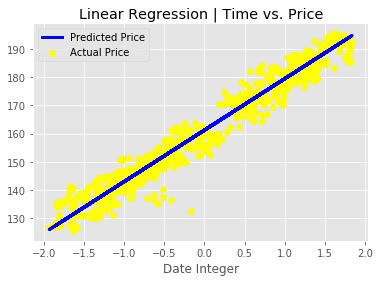

In [21]:
plt.scatter(X_train, y_train, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_train, clf.predict(X_train), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

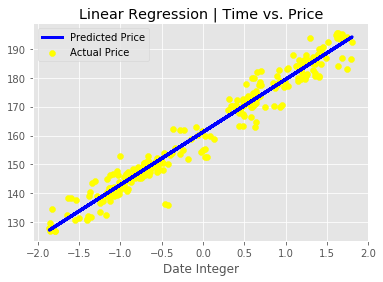

In [22]:
plt.scatter(X_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_test, clf.predict(X_test), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()